In [1]:
import drama as drm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec

import os
import glob
import h5py
import scipy.io as sio

%matplotlib inline

/home/gf/packages/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
fils = sorted(glob.glob('../data/*.mat'), key=os.path.getsize)[:4]
n_files = len(fils)
file_names = [i.split('/')[-1][:-2] for i in fils]
print (file_names)

['lympho.m', 'breastw.m', 'wine.m', 'vertebral.m']


In [3]:
result = []
lof_all = np.zeros((n_files,3))
ifr_all = np.zeros((n_files,3))

for i in range(len(fils)):
    print (file_names[i])
    
    try:
        data = sio.loadmat(fils[i])
        X = data['X'].astype(float)
        y = data['y'].astype(float)

    except:
        data = h5py.File(fils[i])
        X = np.array(data['X']).T.astype(float)
        y = np.array(data['y']).T.astype(float)
        
    res = drm.unsupervised_outlier_finder_all(X)
    arr,drts,metrs = drm.result_array(res,y,'real')
    result.append(arr)
    
    df = drm.sk_check(X,X,y,[1])
    for j,scr in enumerate(['AUC','MCC','RWS']):
        lof_all[i,j] = df[scr][0]
        ifr_all[i,j] = df[scr][1]
    
result = np.array(result)

lympho.m


/home/gf/packages/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/gf/packages/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


NameError: name 'T_o' is not defined

In [ ]:
y_test = np.array([1,2,3,4,5,6])
exec('T_o ='+(' | '.join(['(y_test=='+str(i)+')' for i in [1,2,3]])), globals(),locals())
T_o

In [ ]:
'T_o ='+(' | '.join(['(y_test=='+str(i)+')' for i in [1,2,3]]))

In [ ]:
drm.plot_table(np.mean(result,axis=0),drm.plot_table(np.mean(result,axis=0),drts,metrs))

Text(0,-30,u'** Colors depend on AUC.')

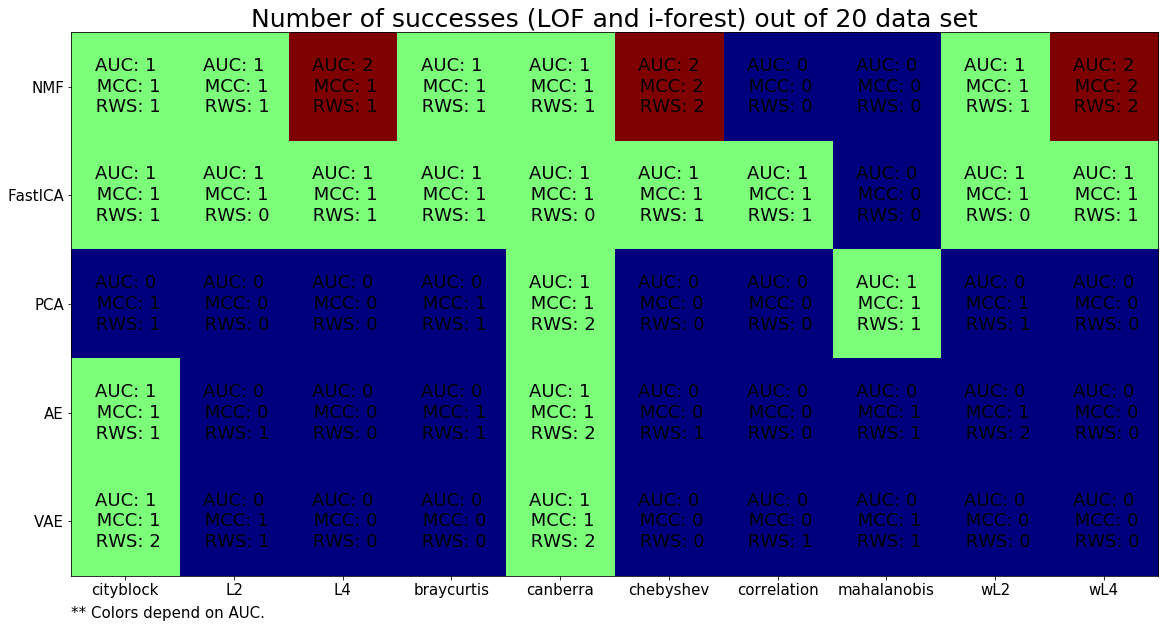

In [8]:
def result,lof_all
    auc = np.sum((result[:, :, :, 0].T>lof_all[:, 0]) & (result[:, :, :, 0].T>ifr_all[:, 0]),axis=-1).T
    mcc = np.sum((result[:, :, :, 1].T>lof_all[:, 1]) & (result[:, :, :, 1].T>ifr_all[:, 1]),axis=-1).T
    rws = np.sum((result[:, :, :, 2].T>lof_all[:, 2]) & (result[:, :, :, 2].T>ifr_all[:, 2]),axis=-1).T

    fig = plt.figure(figsize=(20,10))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect('auto')
    res = ax.imshow(auc, cmap=plt.cm.jet,interpolation='nearest')

    width, height = auc.shape

    for x in xrange(width):
        for y in xrange(height):
            ax.annotate('AUC: {:d}\n MCC: {:d}\n RWS: {:d}'.format(auc[x][y],mcc[x][y],rws[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',fontsize=18);

    plt.xticks(range(10),['cityblock','L2','L4','braycurtis',
                             'canberra','chebyshev','correlation','mahalanobis','wL2','wL4'],fontsize=15)
    plt.yticks(range(5), ['NMF','FastICA','PCA','AE','VAE'],fontsize=15)

    plt.title('Number of successes (LOF and i-forest) out of 20 data set',fontsize=25)
    plt.annotate('** Colors depend on AUC.', (0,0), (0, -30), xycoords='axes fraction',
                 textcoords='offset points', va='top',fontsize=15)

    # plt.savefig('AND_success.jpg',dpi=150,bbox_inches='tight')